# Upphafsstillingar

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/Lokaverkefni Gervigreind/gogn'

#Navigate to the root directory
#os.chdir('/content')

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1C3ruwgZuM9_GkPRVKdgUKF-IJjUck_Kv/Lokaverkefni Gervigreind/gogn


# Komur

In [ ]:
df = pd.read_excel('6146_komur_BM_FV_TIMI_og_DAGS.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,Report 1
1,NaN,NaN,NaN,NaN
2,NaN,Dagsetning innskriftar komu,NaN,NaN
3,NaN,2019-12-29 12:32:44,NaN,NaN
4,NaN,2019-12-29 15:44:27,NaN,NaN


In [ ]:
print(df.shape)

(245986, 4)


In [ ]:
print(df.iloc[2,1])

Dagsetning innskriftar komu


In [ ]:
data = []
for i in range(245982):
  data.append(df.iloc[i+3,1])
print(data[0])
print(data[50])
print(data[245981])

2019-12-29 12:32:44
2020-01-01 01:54:42
2023-12-31 21:45:35


Erum með gögn frá 29.des 2019 til 31.des 2023.
Þar sem komu eru skráðar eftir komutíma. Á því tímabili voru 245.981 komur skráðar á bráðamótökuna fossvogi.

In [ ]:
#Flokka eftir klukkutímum.
times = [dt.time() for dt in data]
hours = [t.hour for t in times]

dagur = [0] * 24

for hour in hours:
    dagur[hour] += 1

print(dagur)

[6302, 4981, 4272, 3588, 3205, 2784, 2923, 4384, 10305, 12269, 14294, 15010, 15058, 15358, 15979, 15329, 15463, 15287, 13786, 13211, 13080, 11305, 9907, 7902]


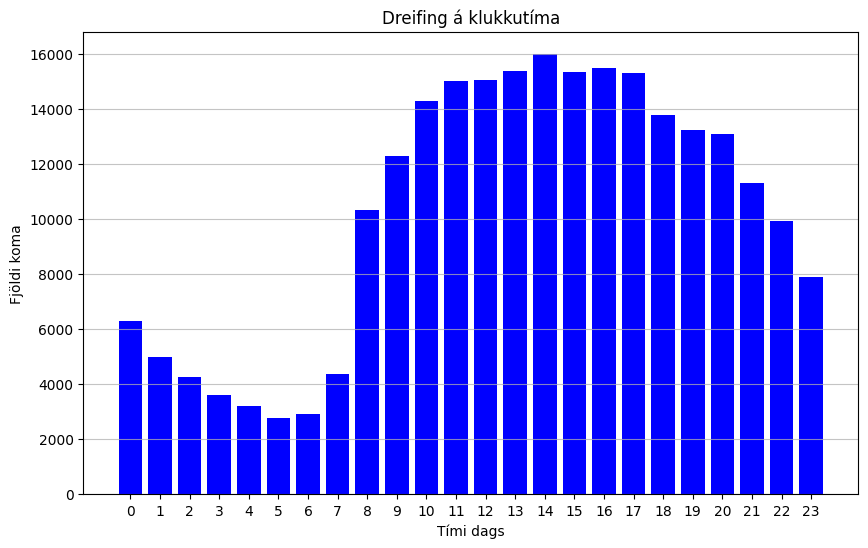

In [ ]:
#Plotta eftir klukkutíma
plt.figure(figsize=(10, 6))
plt.bar(range(24), dagur, color='blue')
plt.xlabel('Tími dags')
plt.ylabel('Fjöldi koma')
plt.title('Dreifing á klukkutíma')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.75)
plt.show()


([<matplotlib.axis.XTick at 0x7839e4c15270>,
 [Text(0, 0, '5:00'),
  Text(1, 0, '6:00'),
  Text(2, 0, '7:00'),
  Text(3, 0, '8:00'),
  Text(4, 0, '9:00'),
  Text(5, 0, '10:00'),
  Text(6, 0, '11:00'),
  Text(7, 0, '12:00'),
  Text(8, 0, '13:00'),
  Text(9, 0, '14:00'),
  Text(10, 0, '15:00'),
  Text(11, 0, '16:00'),
  Text(12, 0, '17:00'),
  Text(13, 0, '18:00'),
  Text(14, 0, '19:00'),
  Text(15, 0, '20:00'),
  Text(16, 0, '21:00'),
  Text(17, 0, '22:00'),
  Text(18, 0, '23:00'),
  Text(19, 0, '0:00'),
  Text(20, 0, '1:00'),
  Text(21, 0, '2:00'),
  Text(22, 0, '3:00'),
  Text(23, 0, '4:00')])

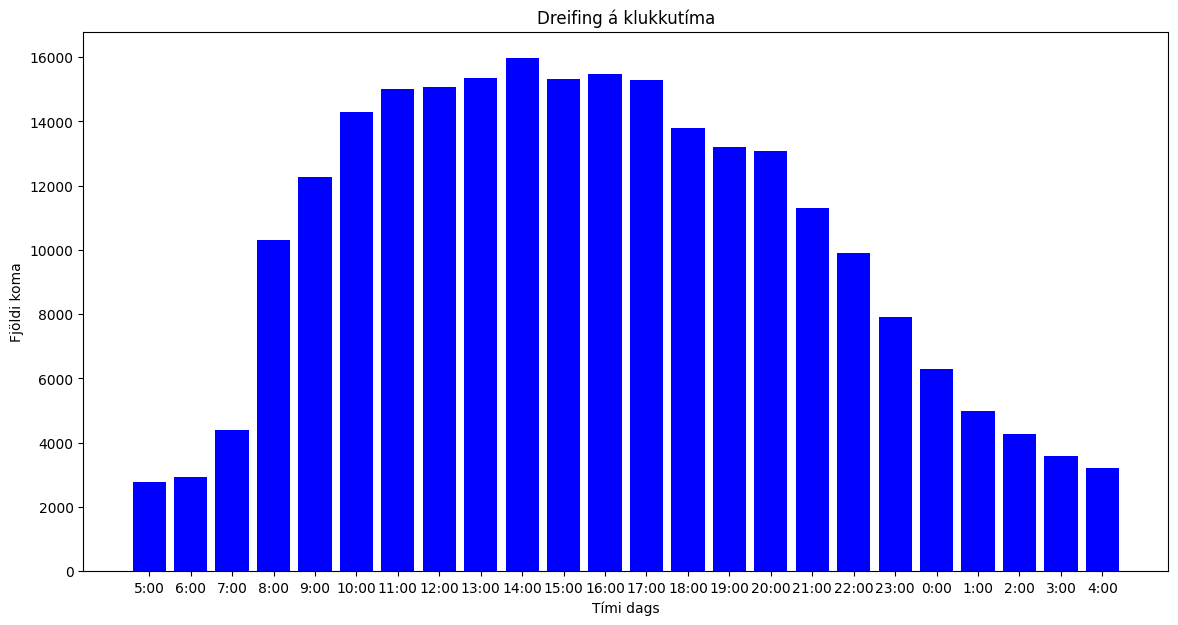

In [ ]:
import scipy.stats as stats
from scipy.stats import gamma

dagur_rotated = dagur[5:] + dagur[:5]

alpha_hat, loc, beta_hat = gamma.fit(dagur_rotated, floc=0)###
x = np.linspace(0, 23, 1000)
p = gamma.pdf(x, alpha_hat, loc, beta_hat)

plt.figure(figsize=(14,7 ))
plt.bar(range(len(dagur_rotated)), dagur_rotated, color='blue')
plt.xlabel('Tími dags')
plt.ylabel('Fjöldi koma')
plt.title('Dreifing á klukkutíma')
plt.xticks(ticks=list(range(24)), labels=[f"{(i+5)%24}:00" for i in range(24)])



Svo virðis sem gögnin fylgi gamma dreifingu

In [ ]:
#Ár
dayes = [dt.date() for dt in data]

ar = [0] * 4

years = [y.year for y in dayes]
for year in years:
    if year > 2019:  # Sleppa 2019
        ar[year - 2020] += 1


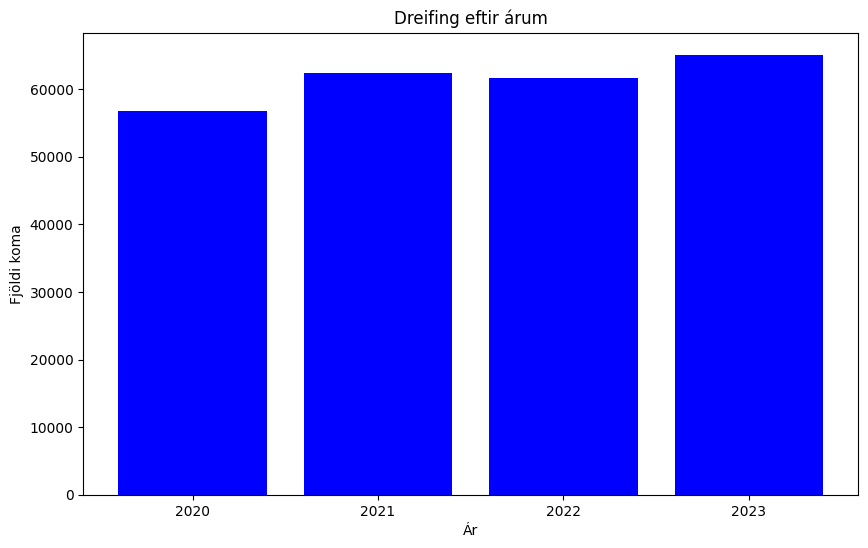

In [ ]:
years_labels = ['2020', '2021', '2022', '2023']

plt.figure(figsize=(10, 6))
plt.bar(years_labels, ar, color='blue')
plt.xlabel('Ár')
plt.ylabel('Fjöldi koma')
plt.title('Dreifing eftir árum')
plt.xticks(years_labels)
plt.show()

Um 60.000 komur eru skráðar á ári

In [ ]:
#Mánuður
months = [m.month for m in dayes]

man = [0] * 12
for day in dayes:
  if day.year > 2019:
      man[day.month-1] +=1

man

[20056,
 19256,
 19789,
 19408,
 22412,
 21248,
 21698,
 21288,
 21132,
 20520,
 19399,
 19742]

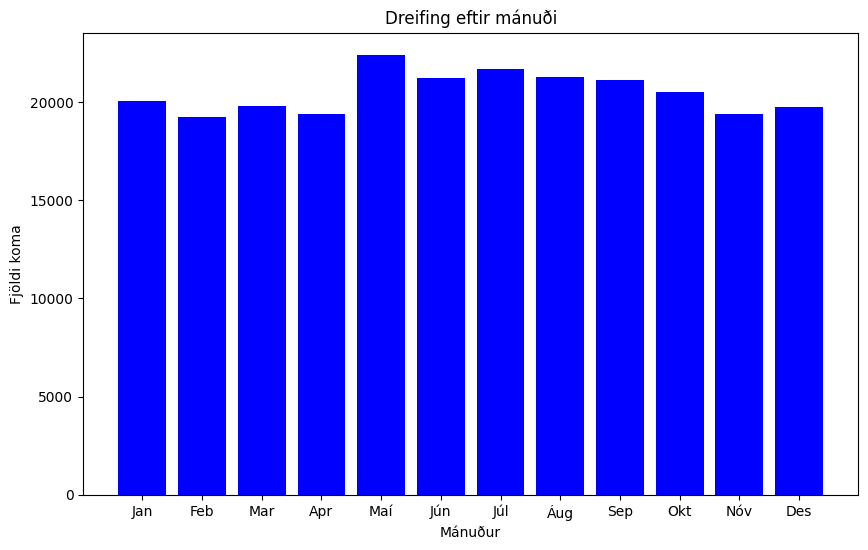

In [ ]:
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Maí', 'Jún', 'Júl', 'Áug', 'Sep', 'Okt', 'Nóv', 'Des']

plt.figure(figsize=(10, 6))
plt.bar(months_labels, man, color='blue')
plt.xlabel('Mánuður')
plt.ylabel('Fjöldi koma')
plt.title('Dreifing eftir mánuði')
plt.xticks(months_labels)
plt.show()

In [ ]:
#Dagar á eftir að laga þarf að gera ráð fyrir hlaupa ári 2020 kannski best að heda honum bara alveg út?

dag = [0]*365
for day in dayes:
  if day.year != 2019 and day.year != 2020:
    day_of_year = day.timetuple().tm_yday  #dagur árs GPT
    dag[day_of_year - 1] += 1

for i in range(len(dag)):
   dag[i] = dag[i] / 3


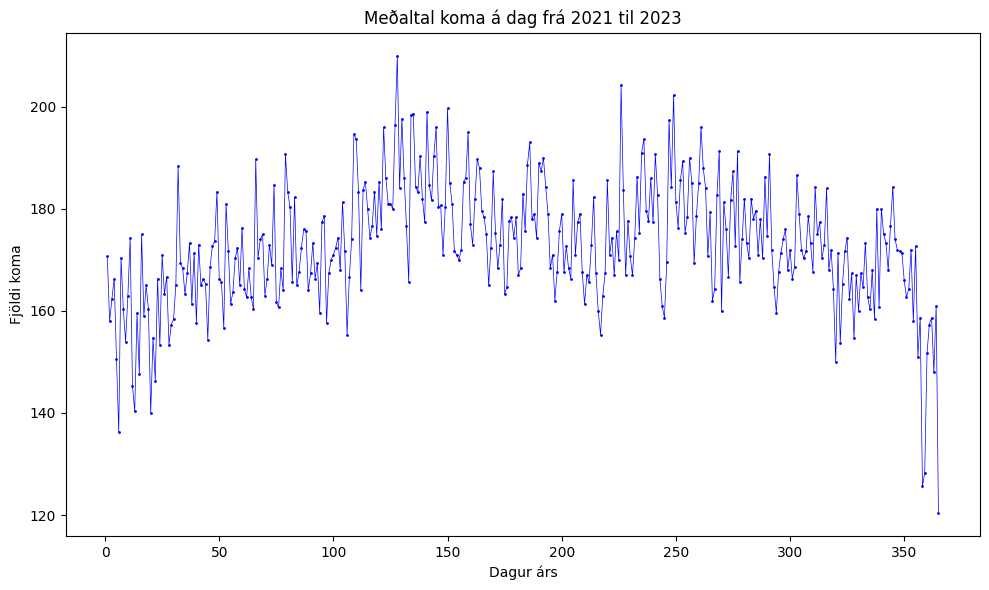

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 365 + 1), dag, color='blue', marker='.', linestyle='-', linewidth=0.5, markersize=2)
plt.xlabel('Dagur árs')
plt.ylabel('Fjöldi koma')
plt.title('Meðaltal koma á dag frá 2021 til 2023')
plt.tight_layout()
plt.show()

In [ ]:
dag2023 = [0]*365
for day in dayes:
  if day.year == 2023:
    day_of_year = day.timetuple().tm_yday  #dagur árs GPT
    dag2023[day_of_year - 1] += 1


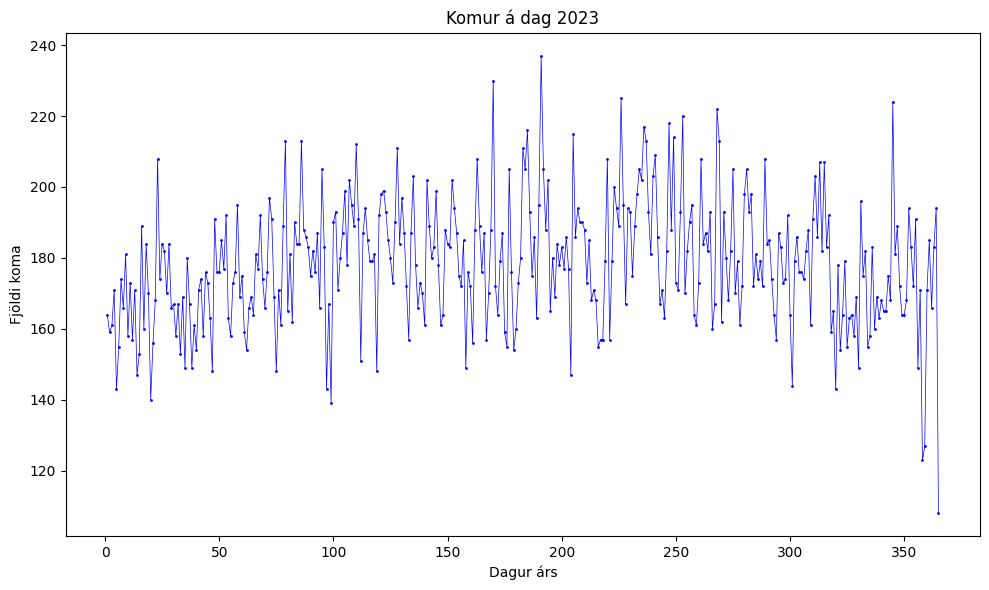

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 365 + 1), dag2023, color='blue', marker='.', linestyle='-', linewidth=0.5, markersize=2)
plt.xlabel('Dagur árs')
plt.ylabel('Fjöldi koma')
plt.title('Komur á dag 2023')
plt.tight_layout()
plt.show()

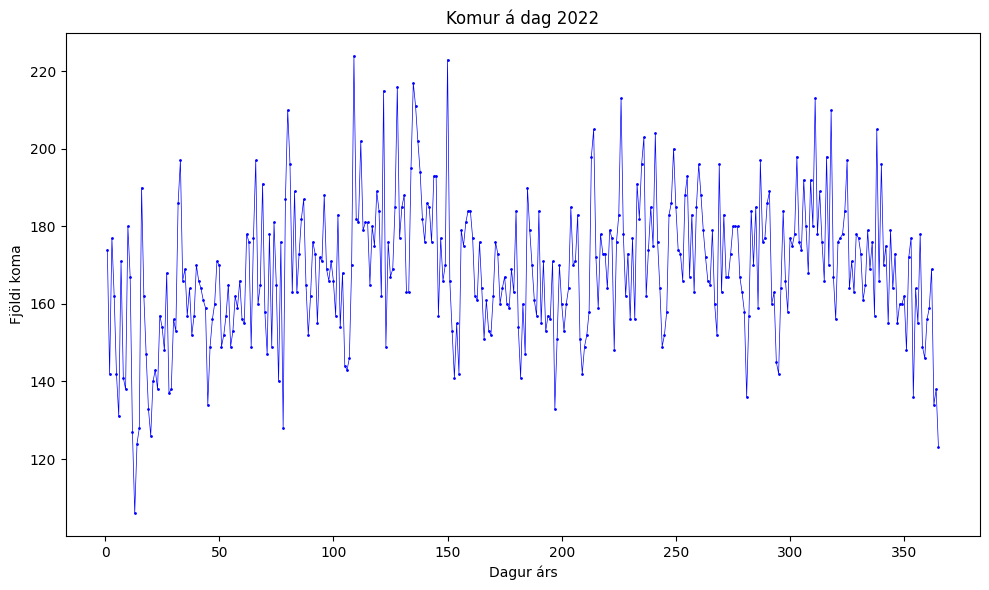

In [ ]:
dag2022 = [0]*365
for day in dayes:
  if day.year == 2022:
    day_of_year = day.timetuple().tm_yday  #dagur árs GPT
    dag2022[day_of_year - 1] += 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, 365 + 1), dag2022, color='blue', marker='.', linestyle='-', linewidth=0.5, markersize=2)
plt.xlabel('Dagur árs')
plt.ylabel('Fjöldi koma')
plt.title('Komur á dag 2022')
plt.tight_layout()
plt.show()

In [ ]:
a2022a2023 = np.concatenate((dag2022, dag2023))
print(a2022a2023.shape)

(730,)


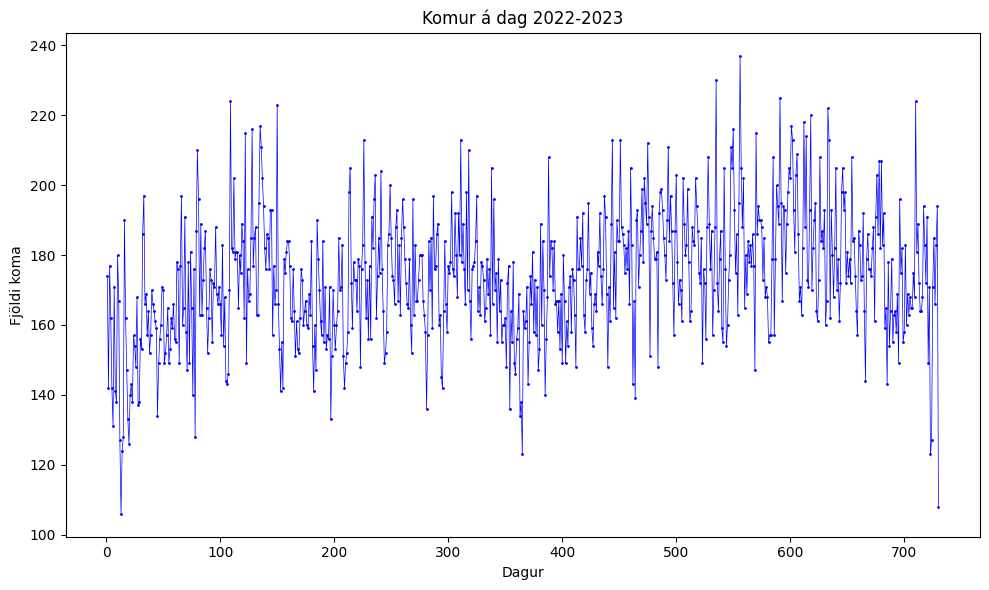

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 730 + 1), a2022a2023, color='blue', marker='.', linestyle='-', linewidth=0.5, markersize=2)
plt.xlabel('Dagur')
plt.ylabel('Fjöldi koma')
plt.title('Komur á dag 2022-2023')
plt.tight_layout()
plt.show()


# Dagar

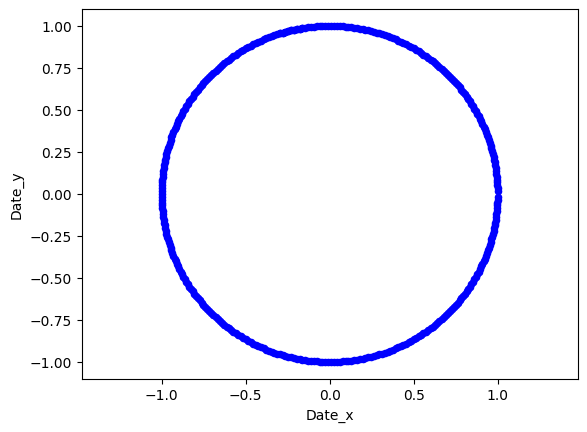

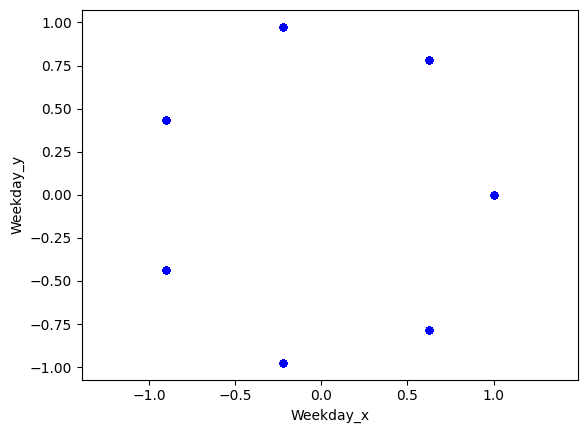

In [ ]:
from datetime import datetime, date, timedelta
import calendar

public_holidays = [
    date(2020, 1, 1),  date(2021, 1, 1),  date(2022, 1, 1),  date(2023, 1, 1),  # Nýársdagur
    date(2020, 5, 1),  date(2021, 5, 1),  date(2022, 5, 1),  date(2023, 5, 1),  # Fyrsti maí - Verkalýðsdagurinn
    date(2020, 6, 17), date(2021, 6, 17), date(2022, 6, 17), date(2023, 6, 17), # Þjóðhátíðardagur Íslands

    date(2019, 12, 24), date(2020, 12, 24), date(2021, 12, 24), date(2022, 12, 24), date(2023, 12, 24), # Aðfangadagur jóla
    date(2019, 12, 25), date(2020, 12, 25), date(2021, 12, 25), date(2022, 12, 25), date(2023, 12, 25), # Jóladagur
    date(2019, 12, 26), date(2020, 12, 26), date(2021, 12, 26), date(2022, 12, 26), date(2023, 12, 26), # Annar í jólum
    date(2019, 12, 31), date(2020, 12, 31), date(2021, 12, 31), date(2022, 12, 31), date(2023, 12, 31), # Gamlársdagur

    date(2020, 4, 9),  date(2021, 4, 1),  date(2022, 4, 14), date(2023, 4, 6),  # Skírdagur
    date(2020, 4, 10), date(2021, 4, 2),  date(2022, 4, 15), date(2023, 4, 7),  # Föstudagurinn langi
    date(2020, 4, 12), date(2021, 4, 4),  date(2022, 4, 17), date(2023, 4, 9),  # Páskadagur
    date(2020, 4, 13), date(2021, 4, 5),  date(2022, 4, 18), date(2023, 4, 10), # Annar í páskum
    date(2020, 4, 23), date(2021, 4, 22), date(2022, 4, 21), date(2023, 4, 20), # Sumardagurinn fyrsti
    date(2020, 5, 21), date(2021, 5, 13), date(2022, 5, 26), date(2023, 5, 18), # Uppstigningardagur
    date(2020, 5, 31), date(2021, 5, 23), date(2022, 6, 5),  date(2023, 6, 28), # Hvítasunnudagur
    date(2020, 6, 1),  date(2021, 5, 24), date(2022, 6, 6),  date(2023, 6, 29), # Annar í hvítasunnu
    date(2020, 8, 3),  date(2021, 8, 2),  date(2022, 8, 1),  date(2023, 8, 7),  # Frídagur verslunarmanna
]

large_events = [
    date(2022, 7, 31), date(2023, 8, 6),  # Þjóðhátíð og Innipúkinn
    date(2022, 8, 20), date(2023, 8, 19), # Menningarnótt
    # Secret Solstice - fann ekki
    date(2022, 8, 6),  date(2023, 8, 12), # Reykjavík Pride
    date(2022, 11, 5), date(2023, 11, 4), # Iceland Airwaves
]

def has_large_event(date):
  return int(date.date() in large_events if isinstance(date, datetime) else date in large_events)

def is_public_holiday(date):
  return int(date.date() in public_holidays if isinstance(date, datetime) else date in public_holidays)

def is_weekend(date):
  return int(date.date().weekday() >= 5 if isinstance(date, datetime) else date.date().weekday() >= 5)  # Mánudagur er 0, sunnudagur er 6

def holidays(from_datetime, to_datetime, interval=24):
  """List of datetimes and if they are large event, public holiday or weekend.
    0: datetime
    1: is weekend
    2: is public holiday
    3: has large event
  """
  list_of_datetimes = []
  current_datetime = from_datetime
  while current_datetime <= to_datetime:
    list_of_datetimes.append([current_datetime, is_public_holiday(current_datetime), has_large_event(current_datetime)])
    current_datetime += timedelta(hours=interval)
  dataframes_of_datetimes = pd.DataFrame(list_of_datetimes, columns=['Date', 'Holiday', 'Event'])

  max_day_of_year = 366
  dataframes_of_datetimes['Date_x'] = np.cos(2 * np.pi * dataframes_of_datetimes['Date'].dt.dayofyear / max_day_of_year)
  dataframes_of_datetimes['Date_y'] = np.sin(2 * np.pi * dataframes_of_datetimes['Date'].dt.dayofyear / max_day_of_year)

  max_weekday = 7
  dataframes_of_datetimes['Weekday_x'] = np.cos(2 * np.pi * dataframes_of_datetimes['Date'].dt.weekday / max_weekday)
  dataframes_of_datetimes['Weekday_y'] = np.sin(2 * np.pi * dataframes_of_datetimes['Date'].dt.weekday / max_weekday)


  dataframes_of_datetimes['Date'] = pd.to_datetime(dataframes_of_datetimes['Date'])
  dataframes_of_datetimes.set_index('Date', inplace=True)

  return dataframes_of_datetimes

from_date = datetime(2022, 4, 11)
to_date = datetime(2023, 4, 19)
days_info = holidays(from_date, to_date)

days_info.plot(kind='scatter', x='Date_x', y='Date_y', color='blue')
plt.axis('equal')
plt.show()

days_info.plot(kind='scatter', x='Weekday_x', y='Weekday_y', color='blue')
plt.axis('equal')
plt.show()

# Ferðafólk

In [ ]:
# Fjöldi um Leifstöð/KEF
fjoldi_um_kef = [
    # ["áááá M mm", Farþegar alls, Íslendingar, Útlendingar]
    ["2019M12", 168850, 43429, 125421],
    ["2020M01", 159248, 37643, 121605],
    ["2020M02", 167496, 33589, 133907],
    ["2020M03",  95486, 14140,  81346],
    ["2020M04",   1262,   338,    924],
    ["2020M05",   1795,   799,    996],
    ["2020M06",  11253,  5135,   6118],
    ["2020M07",  59071, 13355,  45716],
    ["2020M08",  71729,  7922,  63807],
    ["2020M09",  15060,  4885,  10175],
    ["2020M10",   9916,  3924,   5992],
    ["2020M11",   5356,  1983,   3373],
    ["2020M12",  11665,  3516,   8149],
    ["2021M01",  10453,  6089,   4364],
    ["2021M02",   5339,  2342,   2997],
    ["2021M03",   7708,  3121,   4587],
    ["2021M04",   8700,  2912,   5788],
    ["2021M05",  18746,  4373,  14373],
    ["2021M06",  56136, 13569,  42567],
    ["2021M07", 140968, 31036, 109932],
    ["2021M08", 172418, 20569, 151849],
    ["2021M09", 137125, 28892, 108233],
    ["2021M10", 142694, 39467, 103227],
    ["2021M11", 109183, 33727,  75456],
    ["2021M12",  97588, 33270,  64318],
    ["2022M01",  82864, 15208,  67656],
    ["2022M02", 103815, 27985,  75830],
    ["2022M03", 135364, 34191, 101173],
    ["2022M04", 160103, 57875, 102228],
    ["2022M05", 170015, 62412, 107603],
    ["2022M06", 242537, 65857, 176680],
    ["2022M07", 299473, 65284, 234189],
    ["2022M08", 292134, 49464, 242670],
    ["2022M09", 237270, 60282, 176988],
    ["2022M10", 230323, 71536, 158787],
    ["2022M11", 172561, 34368, 138193],
    ["2022M12", 156976, 42188, 114788],
    ["2023M01",	162554, 41501, 121053],
    ["2023M02",	176036, 38959, 137077],
    ["2023M03",	200693, 39777, 160916],
    ["2023M04",	198333, 56153, 142180],
    ["2023M05",	219827, 61515, 158312],
    ["2023M06",	288593, 55284, 233309],
    ["2023M07",	345917, 70626, 275291],
    ["2023M08",	326782, 45268, 281514],
    ["2023M09",	268355, 46752, 221603],
    ["2023M10", 260912, 55946, 204966],
    ["2023M11", 193788, 43442, 150346],
    ["2023M12", 172990, 35902, 137088]
]

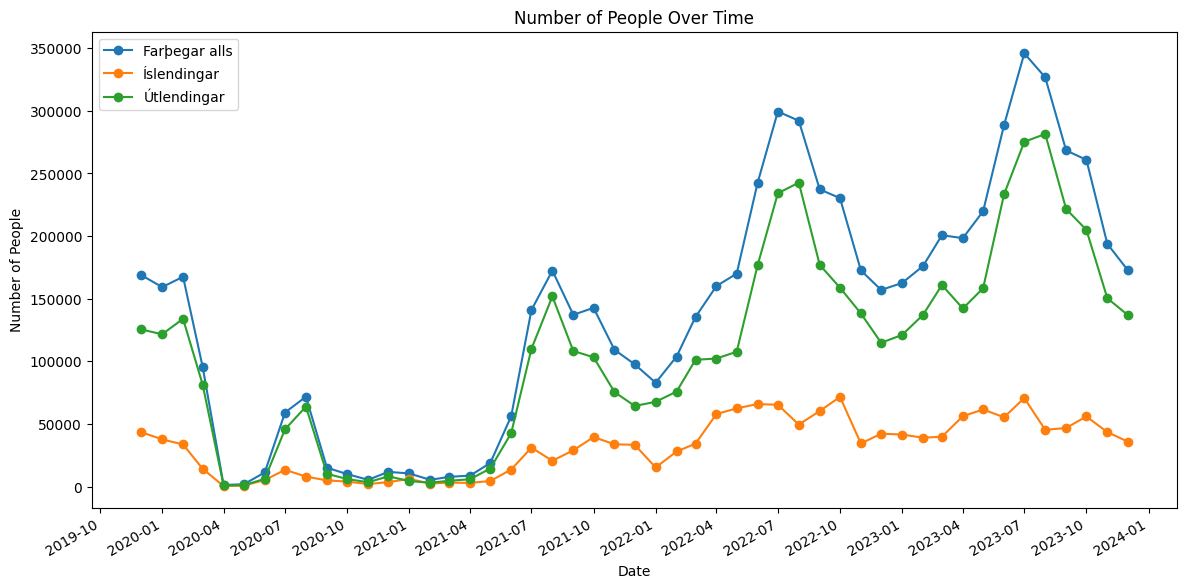

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Extract month-year labels and data for each category
dates = [datetime.strptime(d[0], "%YM%m") for d in fjoldi_um_kef]
farthegar_alls = [d[1] for d in fjoldi_um_kef]
island = [d[2] for d in fjoldi_um_kef]
utlendingar_alls = [d[3] for d in fjoldi_um_kef]

# Create plots
plt.figure(figsize=(14, 7))

# Plot 'Farþegar alls'
plt.plot(dates, farthegar_alls, label='Farþegar alls', marker='o')

# Plot 'Ísland'
plt.plot(dates, island, label='Íslendingar', marker='o')

# Plot 'Útlendingar alls'
plt.plot(dates, utlendingar_alls, label='Útlendingar', marker='o')

# Formatting the date to show month and year only
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Number of People Over Time')

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Veður

In [ ]:
if False:
  weather_data_a = pd.read_excel('Vedurgogn_VI_20240404_GEJ01a.xlsx', sheet_name='Veðurathuganir')
  weather_data_b = pd.read_excel('Vedurgogn_VI_20240404_GEJ01b.xlsx', sheet_name='Veðurathuganir')
  weather_data_c = pd.read_excel('Vedurgogn_VI_20240404_GEJ01c.xlsx', sheet_name='Veðurathuganir')

  weather_data_a.to_csv('weather_data_a.csv', index=False)
  weather_data_b.to_csv('weather_data_b.csv', index=False)
  weather_data_c.to_csv('weather_data_c.csv', index=False)

weather_data_a = pd.read_csv('weather_data_a.csv')
weather_data_b = pd.read_csv('weather_data_b.csv')
weather_data_c = pd.read_csv('weather_data_c.csv')

In [ ]:
direction_to_degrees = {
    'N       ': 0,
    'NNV     ': 337.5,
    'NNA     ': 22.5,
    'NA      ': 45,
    'A       ': 90,
    'ASA     ': 112.5,
    'SA      ': 135,
    'SSA     ': 157.5,
    'ANA     ': 67.5,
    'SSV     ': 202.5,
    'VSV     ': 247.5,
    'VNV     ': 292.5,
    'S       ': 180,
    'NV      ': 315,
    'V       ': 270,
    'SV      ': 225,
    np.nan: np.nan
}

# [0] lausamjöll, [1] alþakin snjó, [2] aðallega hulin svellum
SNC_buckets = {
    np.nan:                             [np.nan, np.nan, np.nan],
    'þakin snjó að litlu leyti':        [0, 0, 0],
    'þakin snjó að miklu leyti':        [0, 0, 0],
    'aðallega hulin svellum':           [0, 0, 1],
    'alþakin snjó og sköflum':          [0, 1, 0],
    'alþakin misþykku lagi af snjó':    [0, 1, 0],
    'alþakin jafnföllnum snjó':         [0, 1, 0],
    'þakin lausamjöl að litlu leyti':   [1, 0, 0],
    'þakin lausamjöll að miklu leyti':  [1, 0, 0],
    'alþakin misþykkri lausamjöll':     [1, 1, 0],
    'alþakin jafnfallin lausamjöll':    [1, 1, 0],
}

# [0] Hætta, [1] Snjókoma, [2] Bleyta, [3] Óþægindi
W_scales = {
    np.nan:                       [np.nan,np.nan,np.nan,np.nan],
    'Snjókoma':                   [0.4, 0.8, 0.6, 0.4],
    'Rigning':                    [0.2, 0.0, 0.8, 0.5],
    'Rigning og súld':            [0.2, 0.0, 0.9, 0.5],
    'Rigning á síð. klst.':       [0.1, 0.0, 0.7, 0.4],
    'Súld':                       [0.2, 0.1, 0.9, 0.5],
    'Súld á síð. klst.':          [0.1, 0.1, 0.8, 0.4],
    'Úrkoma í grennd':            [0.1, 0.0, 0.4, 0.2],
    'Skúrir':                     [0.3, 0.2, 0.7, 0.3],
    'Slydduél':                   [0.4, 0.6, 0.6, 0.3],
    'Slydda á síð. klst.':        [0.3, 0.5, 0.5, 0.3],
    'Snjóél á síð. klst.':        [0.3, 0.7, 0.4, 0.2],
    'Kornsnjór':                  [0.4, 0.8, 0.2, 0.1],
    'Snjókoma á síð. klst.':      [0.4, 0.8, 0.5, 0.3],
    'Slydda':                     [0.3, 0.5, 0.6, 0.4],
    'Snjóél':                     [0.3, 0.7, 0.3, 0.5],
    'Þoka í grennd':              [0.1, 0.0, 0.1, 0.6],
    'Lágþoka':                    [0.1, 0.0, 0.1, 0.7],
    'Þoka á síð. klst.':          [0.1, 0.0, 0.1, 0.5],
    'Skúr á síð. klst.':          [0.2, 0.1, 0.6, 0.3],
    'Þokumóða':                   [0.1, 0.0, 0.1, 0.6],
    'Haglél':                     [0.4, 0.3, 0.5, 0.4],
    'Þokuruðningur':              [0.2, 0.0, 0.2, 0.8],
    'Þoka':                       [0.1, 0.0, 0.1, 0.7],
    'Lágþokublettir':             [0.1, 0.0, 0.1, 0.6],
    'Skafrenningur':              [0.5, 0.6, 0.1, 0.5],
    'Haglél á síð. klst.':        [0.3, 0.2, 0.4, 0.3],
    'Frostúði':                   [0.2, 0.1, 0.2, 0.7],
    'Mikil snjókoma':             [0.6, 0.9, 0.7, 0.5],
    'Ískorn':                     [0.3, 0.4, 0.3, 0.6],
    'Þrumuveður':                 [0.7, 0.0, 0.5, 0.8]
}

def direction_to_vector(direction):
    angle = direction_to_degrees[direction]
    angle_radians = np.radians(angle)
    return np.round(np.cos(angle_radians), 2), np.round(np.sin(angle_radians), 2)

In [ ]:
if False:
  plt.figure(figsize=(10, 5))
  W_scales = dict(sorted(W_scales.items(), key=lambda item: item[1][0]))
  plt.barh(list(W_scales.keys()), [value[0] for key, value in W_scales.items()], color='red')
  plt.xlim(0, 1)
  plt.title('Hætta')
  plt.show()

  plt.figure(figsize=(10, 5))
  W_scales = dict(sorted(W_scales.items(), key=lambda item: item[1][1]))
  plt.barh(list(W_scales.keys()), [value[1] for key, value in W_scales.items()], color='skyblue')
  plt.xlim(0, 1)
  plt.title('Snjókoma')
  plt.show()

  plt.figure(figsize=(10, 5))
  W_scales = dict(sorted(W_scales.items(), key=lambda item: item[1][2]))
  plt.barh(list(W_scales.keys()), [value[2] for key, value in W_scales.items()], color='blue')
  plt.xlim(0, 1)
  plt.title('Bleyta')
  plt.show()

  plt.figure(figsize=(10, 5))
  W_scales = dict(sorted(W_scales.items(), key=lambda item: item[1][3]))
  plt.barh(list(W_scales.keys()), [value[3] for key, value in W_scales.items()], color='orange')
  plt.xlim(0, 1)
  plt.title('Óþægindi')
  plt.show()

In [ ]:
w_data = pd.concat([weather_data_a, weather_data_b, weather_data_c], ignore_index=True)
w_data.rename(columns={'TIMI': 'Date'}, inplace=True)
w_data['Date'] = pd.to_datetime(w_data['Date'])
w_data['V'] = w_data['V'].str.replace(' km', '').str.replace('>', '').astype(float)
w_data[['ATT_N', 'ATT_E']] = w_data['ATT'].apply(lambda x: pd.Series(direction_to_vector(x)))
#w_data[['Lausamjöll', 'Alþakin snjó', 'Aðallega hulin svellum']] = w_data['SNC'].apply(lambda x: pd.Series(SNC_buckets[x]))
w2_data = w_data.copy()
columns_to_drop = ['AR', 'MAN', 'DAGUR', 'KLST', 'TX', 'TN', 'TD', 'T0', 'TW', 'RTEG', 'SUN', 'SNCM', 'E', 'S', 'W1', 'W2', 'W3', 'RH', 'D', 'FX', 'P', 'N', 'ATT', 'SNC']
w_data.drop(columns_to_drop, axis=1, inplace=True)

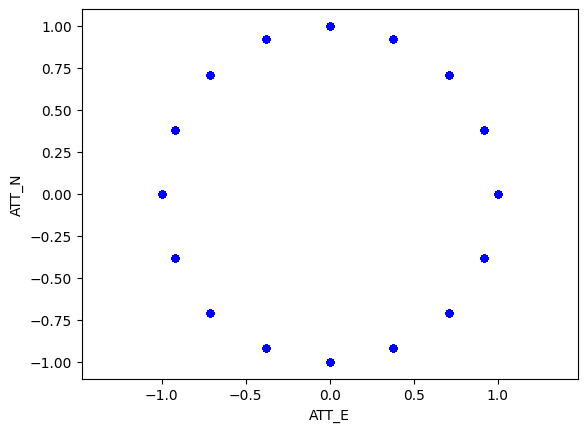

In [ ]:
w_data.plot(kind='scatter', x='ATT_E', y='ATT_N', color='blue')
plt.axis('equal')
plt.show()

In [ ]:
w_data

,STOD,Date,T,F,FG,R,TGN,V,SND,W,ATT_N,ATT_E
0,1471,2019-12-10 12:00:00,1.6,11.600000,15.9,NaN,NaN,NaN,NaN,NaN,1.00,0.00
1,1471,2019-12-10 13:00:00,2.2,10.600000,18.5,NaN,NaN,NaN,NaN,NaN,1.00,0.00
2,1471,2019-12-10 14:00:00,1.3,16.299999,23.9,NaN,NaN,NaN,NaN,NaN,1.00,0.00
3,1471,2019-12-10 15:00:00,0.9,19.600000,23.9,NaN,NaN,NaN,NaN,NaN,0.92,-0.38
4,1471,2019-12-10 16:00:00,0.4,22.000000,29.0,NaN,NaN,NaN,NaN,NaN,0.92,-0.38
...,...,...,...,...,...,...,...,...,...,...,...,...
270921,1,2024-01-01 09:00:00,-1.8,0.900000,6.4,NaN,-8.3,45.0,20.0,NaN,-0.00,-1.00
270922,1,2024-01-01 12:00:00,2.5,1.800000,2.8,NaN,NaN,45.0,NaN,NaN,0.00,1.00
270923,1,2024-01-01 15:00:00,4.0,4.800000,9.4,NaN,NaN,40.0,NaN,Rigning á síð. klst.,0.00,1.00
270924,1,2024-01-01 18:00:00,4.2,5.200000,11.0,1.6,NaN,25.0,NaN,Rigning,0.00,1.00


In [ ]:
#print('ATT', weather_data['ATT'].unique())
ATT = ['N       ', 'NNV     ', 'NNA     ', 'NA      ', 'A       ', 'ASA     ', 'SA      ', 'SSA     ', 'ANA     ', 'SSV     ', 'VSV     ', 'VNV     ', 'S       ', 'NV      ', 'V       ', 'SV      ', np.nan]
#print('SNC', weather_data['SNC'].unique())
SNC = [np.nan, 'þakin snjó að litlu leyti', 'þakin snjó að miklu leyti', 'alþakin misþykku lagi af snjó', 'alþakin jafnföllnum snjó', 'alþakin jafnfallin lausamjöll', 'þakin lausamjöl að litlu leyti', 'aðallega hulin svellum', 'þakin lausamjöll að miklu leyti', 'alþakin misþykkri lausamjöll', 'alþakin snjó og sköflum']
#print('W', weather_data['W'].unique())
W = [np.nan, 'Snjókoma', 'Rigning', 'Rigning og súld', 'Rigning á síð. klst.', 'Súld', 'Súld á síð. klst.', 'Úrkoma í grennd', 'Skúrir', 'Slydduél', 'Slydda á síð. klst.', 'Snjóél á síð. klst.', 'Kornsnjór', 'Snjókoma á síð. klst.', 'Slydda', 'Snjóél', 'Þoka í grennd', 'Lágþoka', 'Þoka á síð. klst.', 'Skúr á síð. klst.', 'Þokumóða', 'Haglél', 'Þokuruðningur', 'Þoka', 'Lágþokublettir', 'Skafrenningur', 'Haglél á síð. klst.', 'Frostúði', 'Mikil snjókoma', 'Ískorn', 'Þrumuveður']

In [ ]:
w_data.dtypes

STOD              int64
Date     datetime64[ns]
T               float64
F               float64
FG              float64
R               float64
TGN             float64
V               float64
SND             float64
W                object
ATT_N           float64
ATT_E           float64
dtype: object

# Aggregate

In [ ]:
def most_frequent(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

def aggregate(arrivals, weathers,
              from_datetime=datetime(2020,1,1), to_datetime=datetime(2023,12,31),
              interval='D', imputation=True, all_columns=False):
  if all_columns:
    columns_dict = {'T': 'mean', 'F': 'mean', 'FG': 'mean', 'R': 'mean', 'TGN': 'mean', 'V': 'mean','SND': 'mean', 'ATT_N': 'mean', 'ATT_E': 'mean','AR': 'mean', 'MAN': 'mean', 'DAGUR': 'mean', 'KLST': 'mean', 'TX': 'mean', 'TN': 'mean', 'TD': 'mean', 'T0': 'mean', 'RH': 'mean',
       'D': 'mean', 'FX': 'mean', 'P': 'mean', 'TW': 'mean', 'RTEG': 'mean', 'N': 'mean', 'SUN': 'mean', 'SNCM': 'mean', 'SND': 'mean', 'S': 'mean'}
  else:
    columns_dict = {
      'T': 'mean',
      'F': 'mean',
      'FG': 'mean',
      'R': 'mean',
      'TGN': 'mean',
      'V': 'mean',
      #'SNC': most_frequent,
      'SND': 'mean',
      #'W': most_frequent,
      'ATT_N': 'mean',
      'ATT_E': 'mean'
    }

  arrivals['Count'] = 1
  agg_arrivals = arrivals.resample(interval).sum()
  agg_weathers = weathers.resample(interval).agg(columns_dict)
  aggregated_data = pd.merge(pd.merge(agg_arrivals, agg_weathers, left_index=True, right_index=True, how='inner'),
                             holidays(from_datetime, to_datetime),
                             left_index=True, right_index=True, how='inner')
  if imputation:
    aggregated_data['T'].interpolate(method='linear', inplace=True)
    aggregated_data['F'].interpolate(method='linear', inplace=True)
    aggregated_data['FG'].interpolate(method='linear', inplace=True)
    aggregated_data['R'].interpolate(method='linear', inplace=True)
    aggregated_data['TGN'].interpolate(method='linear', inplace=True)
    aggregated_data['V'].interpolate(method='linear', inplace=True)
    aggregated_data['ATT_N'].interpolate(method='linear', inplace=True)
    aggregated_data['ATT_E'].interpolate(method='linear', inplace=True)
    aggregated_data.fillna(0, inplace=True)
  return aggregated_data

In [ ]:
def lag_columns(data_frame, n_lags=1, columns=None, skip_columns=None):
    if columns is None:
      columns = data_frame.columns

    if skip_columns:
      columns_to_lag = [col for col in columns if col not in skip_columns]
    else:
      columns_to_lag = columns

    # Dictionary to hold the new lagged columns
    lagged_cols = {}

    for var in columns_to_lag:
      for lag in range(1, n_lags + 1):
        lagged_col_name = f'{var}_Lag{lag}'
        lagged_cols[lagged_col_name] = data_frame[var].shift(lag)

    # Create a new DataFrame from the lagged columns
    lagged_df = pd.DataFrame(lagged_cols)

    # Concatenate the new lagged columns with the original DataFrame
    new_data_frame = pd.concat([data_frame[columns], lagged_df], axis=1)

    # Drop the rows with NaN values that result from lagging
    return new_data_frame.dropna()  # Ensure returning the updated DataFrame including lagged columns

# Example usage
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Temperature': range(10, 20),
    'Humidity': range(20, 30)
})

# Adding 2 lags to Temperature and Humidity, skipping 'Date'
df_lagged = lag_columns(df, n_lags=2, skip_columns=['Date'])
print(df_lagged)

        Date  Temperature  Humidity  Temperature_Lag1  Temperature_Lag2  \
2 2023-01-03           12        22              11.0              10.0   
3 2023-01-04           13        23              12.0              11.0   
4 2023-01-05           14        24              13.0              12.0   
5 2023-01-06           15        25              14.0              13.0   
6 2023-01-07           16        26              15.0              14.0   
7 2023-01-08           17        27              16.0              15.0   
8 2023-01-09           18        28              17.0              16.0   
9 2023-01-10           19        29              18.0              17.0   

   Humidity_Lag1  Humidity_Lag2  
2           21.0           20.0  
3           22.0           21.0  
4           23.0           22.0  
5           24.0           23.0  
6           25.0           24.0  
7           26.0           25.0  
8           27.0           26.0  
9           28.0           27.0  


# Samsett gögn

In [ ]:
arrivals_data = pd.DataFrame({'Date': pd.to_datetime(data)})
arrivals_data.set_index('Date', inplace=True)

print(arrivals_data)

Empty DataFrame
Columns: []
Index: [2019-12-29 12:32:44, 2019-12-29 15:44:27, 2019-12-29 18:41:52, 2019-12-30 12:20:49, 2019-12-30 19:15:32, 2019-12-30 19:20:36, 2019-12-30 21:49:58, 2019-12-31 01:05:27, 2019-12-31 09:44:04, 2019-12-31 10:21:27, 2019-12-31 10:40:04, 2019-12-31 11:16:21, 2019-12-31 12:23:49, 2019-12-31 12:54:54, 2019-12-31 13:06:46, 2019-12-31 14:59:56, 2019-12-31 15:31:34, 2019-12-31 15:41:23, 2019-12-31 18:06:15, 2019-12-31 18:55:04, 2019-12-31 19:08:41, 2019-12-31 19:40:03, 2019-12-31 19:56:41, 2019-12-31 20:53:23, 2019-12-31 21:35:05, 2019-12-31 22:06:03, 2019-12-31 22:37:43, 2019-12-31 22:48:23, 2019-12-31 22:59:00, 2019-12-31 23:00:33, 2019-12-31 23:23:09, 2019-12-31 23:52:11, 2019-12-31 23:53:32, 2019-12-31 23:55:13, 2020-01-01 00:07:29, 2020-01-01 00:23:40, 2020-01-01 00:27:34, 2020-01-01 00:29:31, 2020-01-01 00:31:18, 2020-01-01 00:32:45, 2020-01-01 00:35:14, 2020-01-01 00:44:03, 2020-01-01 00:49:56, 2020-01-01 00:53:22, 2020-01-01 00:56:51, 2020-01-01 01:06:39

In [ ]:
weather_data = pd.DataFrame(w_data)
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
weather_data.set_index('Date', inplace=True)

weather_data

,STOD,T,F,FG,R,TGN,V,SND,W,ATT_N,ATT_E
Date,,,,,,,,,,,
2019-12-10 12:00:00,1471,1.6,11.600000,15.9,NaN,NaN,NaN,NaN,NaN,1.00,0.00
2019-12-10 13:00:00,1471,2.2,10.600000,18.5,NaN,NaN,NaN,NaN,NaN,1.00,0.00
2019-12-10 14:00:00,1471,1.3,16.299999,23.9,NaN,NaN,NaN,NaN,NaN,1.00,0.00
2019-12-10 15:00:00,1471,0.9,19.600000,23.9,NaN,NaN,NaN,NaN,NaN,0.92,-0.38
2019-12-10 16:00:00,1471,0.4,22.000000,29.0,NaN,NaN,NaN,NaN,NaN,0.92,-0.38
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 09:00:00,1,-1.8,0.900000,6.4,NaN,-8.3,45.0,20.0,NaN,-0.00,-1.00
2024-01-01 12:00:00,1,2.5,1.800000,2.8,NaN,NaN,45.0,NaN,NaN,0.00,1.00
2024-01-01 15:00:00,1,4.0,4.800000,9.4,NaN,NaN,40.0,NaN,Rigning á síð. klst.,0.00,1.00


In [ ]:
aggregate(arrivals_data, weather_data, from_datetime=datetime(2022, 4, 11), to_datetime=datetime(2022, 4, 19))

,Count,T,F,FG,R,TGN,V,SND,ATT_N,ATT_E,Holiday,Event,Date_x,Date_y,Weekday_x,Weekday_y
Date,,,,,,,,,,,,,,,,
2022-04-11,157,4.484375,6.778125,10.775000,0.0,0.5,65.0000,0.0,0.320625,0.932500,0,0,-0.162366,0.986731,1.000000,0.000000
2022-04-12,183,6.018750,6.434375,10.346875,0.0,2.6,65.0000,0.0,0.178125,0.962500,0,0,-0.179281,0.983798,0.623490,0.781831
2022-04-13,154,6.281250,5.784375,9.531250,0.0,-0.5,57.7500,0.0,0.153438,0.896563,0,0,-0.196143,0.980575,-0.222521,0.974928
2022-04-14,168,8.384375,9.740625,15.321875,1.4,4.5,14.6250,0.0,-0.312812,0.912188,1,0,-0.212947,0.977064,-0.900969,0.433884
2022-04-15,144,8.215625,11.596875,17.178125,1.2,6.2,13.7500,0.0,-0.810312,0.457187,1,0,-0.229688,0.973264,-0.900969,-0.433884
2022-04-16,143,8.787500,8.962500,13.912500,2.0,7.2,13.7500,0.0,-0.620000,0.755000,0,0,-0.246361,0.969178,-0.222521,-0.974928
2022-04-17,146,6.331250,3.937500,6.665625,0.3,4.1,27.1875,0.0,-0.663750,-0.221250,1,0,-0.262962,0.964806,0.623490,-0.781831
2022-04-18,170,5.653125,4.143750,5.953125,0.3,-0.5,62.5000,0.0,0.375312,0.046562,1,0,-0.279486,0.960150,1.000000,0.000000
2022-04-19,224,5.806250,3.656250,5.937500,0.3,-3.6,62.5000,0.0,0.312812,0.075313,0,0,-0.295927,0.955211,0.623490,0.781831


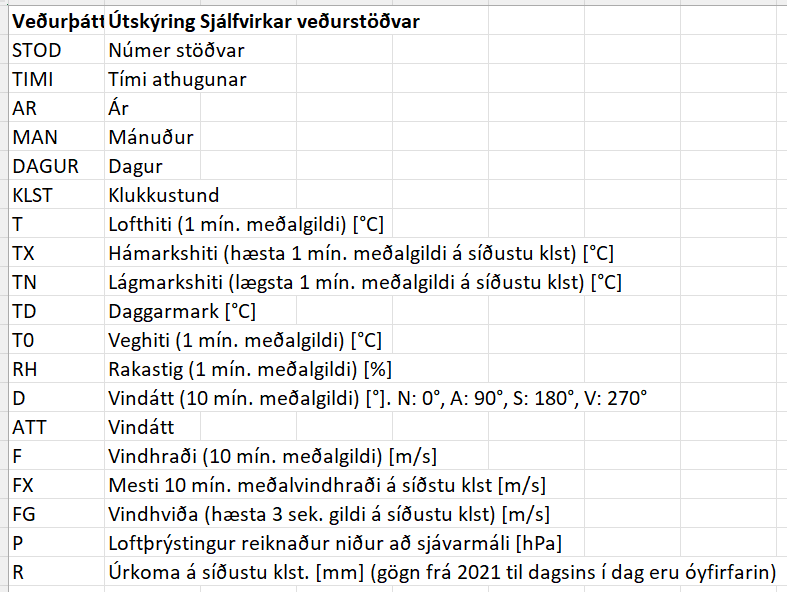

# Fylgni

In [ ]:
weather_data2 = pd.DataFrame(w2_data)
weather_data2['Date'] = pd.to_datetime(weather_data2['Date'])
weather_data2.set_index('Date', inplace=True)

weather_data2.columns

Index(['STOD', 'AR', 'MAN', 'DAGUR', 'KLST', 'T', 'TX', 'TN', 'TD', 'T0', 'RH',
       'D', 'ATT', 'F', 'FX', 'FG', 'P', 'R', 'TGN', 'TW', 'RTEG', 'V', 'N',
       'SUN', 'SNC', 'SNCM', 'SND', 'E', 'S', 'W', 'W1', 'W2', 'W3', 'ATT_N',
       'ATT_E'],
      dtype='object')

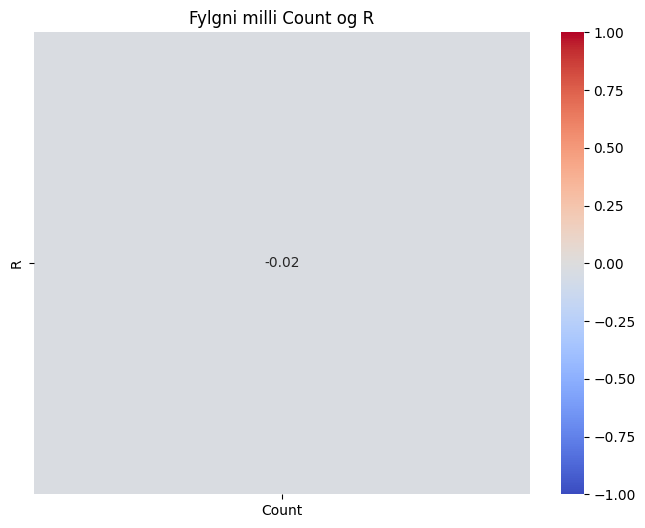

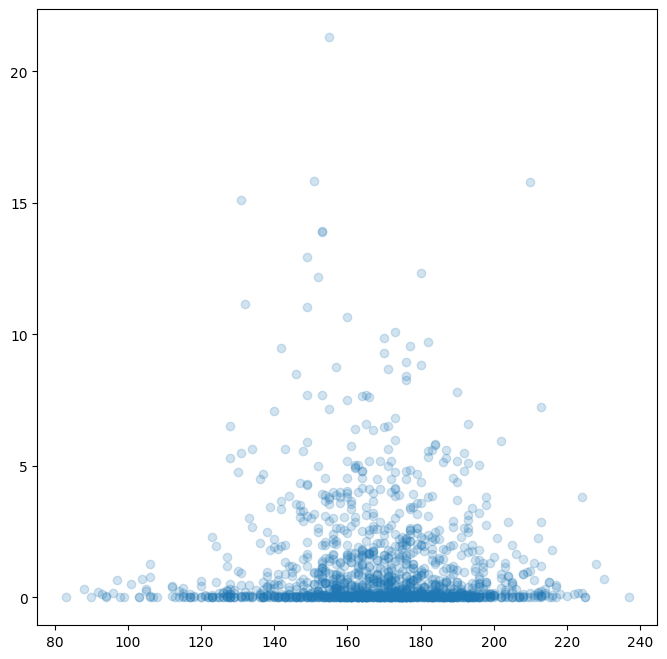

In [ ]:
# @title Fylgni milli dálka
dalkur = "R" # @param ['T', 'F', 'FG', 'R', 'TGN', 'V', 'SND', 'ATT_N', 'ATT_E', 'AR', 'MAN', 'DAGUR', 'KLST', 'TX', 'TN', 'TD', 'T0', 'RH', 'D', 'FX', 'P', 'TW', 'RTEG', 'N', 'SUN', 'SNCM', 'S', 'Holiday', 'Event', 'Date_x', 'Date_y', 'Weekday_x', 'Weekday_y']
N_lags = 0 # @param {type:"integer"}
target_column = "Count" # @param ["Count"] {allow-input: true}

import seaborn as sns

data_to_compare = lag_columns(aggregate(arrivals_data, weather_data2, all_columns=True), n_lags=N_lags, columns=[target_column, dalkur], skip_columns=[target_column])

columns_to_compare = list(data_to_compare.columns[1:])

correlation_matrix = data_to_compare[columns_to_compare + [target_column]].corr().loc[columns_to_compare, [target_column]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,  fmt=".2f")
plt.title(f'Fylgni milli {target_column} og {dalkur}')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(data_to_compare[target_column], data_to_compare[dalkur], alpha=0.2)
plt.show()

# Baseline model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

the_seed = 42

aggregated_data = aggregate(arrivals_data, weather_data)

aggregated_data = lag_columns(aggregated_data, n_lags=4, skip_columns=['Date_x', 'Date_y', 'Weekday_x', 'Weekday_y'])

X = aggregated_data.drop('Count', axis=1)
y = aggregated_data['Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=the_seed)

# Model initialization and parameter grid
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
best_model = model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 248.2420455773005
R² Score: 0.40364729591394166


In [ ]:
aggregated_data

,Count,T,F,FG,R,TGN,V,SND,ATT_N,ATT_E,...,ATT_E_Lag3,ATT_E_Lag4,Holiday_Lag1,Holiday_Lag2,Holiday_Lag3,Holiday_Lag4,Event_Lag1,Event_Lag2,Event_Lag3,Event_Lag4
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,164,2.738953,6.646802,12.798256,0.154795,0.1,20.3750,0.0,-0.692238,0.035436,...,-0.529767,-0.446831,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-06,217,2.419477,6.280233,11.270640,0.404795,-0.2,20.3750,0.0,0.012297,-0.113576,...,-0.193721,-0.529767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-07,173,0.772674,10.604070,18.166279,0.077397,-1.6,15.1500,0.0,-0.205552,0.156192,...,0.552558,-0.193721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-08,164,-1.088081,10.827326,18.915407,0.121918,-4.7,10.9125,1.0,-0.355291,-0.824244,...,0.035436,0.552558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-09,139,-2.364535,8.739535,16.634012,0.069863,-3.4,7.1000,1.0,-0.678227,-0.689797,...,-0.113576,0.035436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,185,-2.881250,0.493750,1.884375,0.152000,-3.8,53.1250,23.0,-0.048437,0.155313,...,0.091875,0.813438,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-12-28,166,-2.225000,1.590625,4.271875,0.030769,-9.6,24.2875,22.0,0.247812,0.601562,...,0.523750,0.091875,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2023-12-29,183,-4.343750,0.618750,1.815625,0.112000,-5.7,24.3125,25.0,-0.311563,0.348438,...,0.806563,0.523750,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
print(aggregated_data.columns)

Index(['Count', 'T', 'F', 'FG', 'R', 'TGN', 'V', 'SND', 'ATT_N', 'ATT_E',
       'Holiday', 'Event', 'Date_x', 'Date_y', 'Weekday_x', 'Weekday_y',
       'Count_Lag1', 'Count_Lag2', 'Count_Lag3', 'Count_Lag4', 'T_Lag1',
       'T_Lag2', 'T_Lag3', 'T_Lag4', 'F_Lag1', 'F_Lag2', 'F_Lag3', 'F_Lag4',
       'FG_Lag1', 'FG_Lag2', 'FG_Lag3', 'FG_Lag4', 'R_Lag1', 'R_Lag2',
       'R_Lag3', 'R_Lag4', 'TGN_Lag1', 'TGN_Lag2', 'TGN_Lag3', 'TGN_Lag4',
       'V_Lag1', 'V_Lag2', 'V_Lag3', 'V_Lag4', 'SND_Lag1', 'SND_Lag2',
       'SND_Lag3', 'SND_Lag4', 'ATT_N_Lag1', 'ATT_N_Lag2', 'ATT_N_Lag3',
       'ATT_N_Lag4', 'ATT_E_Lag1', 'ATT_E_Lag2', 'ATT_E_Lag3', 'ATT_E_Lag4',
       'Holiday_Lag1', 'Holiday_Lag2', 'Holiday_Lag3', 'Holiday_Lag4',
       'Event_Lag1', 'Event_Lag2', 'Event_Lag3', 'Event_Lag4'],
      dtype='object')


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=the_seed, n_jobs=-1)

# Organize importances into a DataFrame
perm_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_mean': result.importances_mean,
    'Importance_std': result.importances_std
})
perm_importances_df = perm_importances_df.sort_values(by='Importance_mean', ascending=False)

perm_importances_df

,Feature,Importance_mean,Importance_std
15,Count_Lag1,0.145179,0.017943
13,Weekday_x,0.124724,0.017969
2,FG,0.107449,0.014001
45,SND_Lag3,0.097659,0.011514
17,Count_Lag3,0.064399,0.019521
...,...,...,...
8,ATT_E,-0.001826,0.003974
32,R_Lag2,-0.002726,0.001855
57,Holiday_Lag3,-0.003327,0.003270
28,FG_Lag2,-0.005807,0.004225


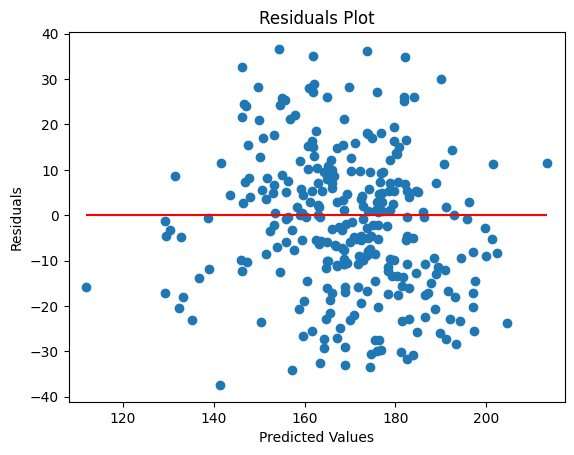

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axis('equal')
plt.title('Residuals Plot')
plt.show()


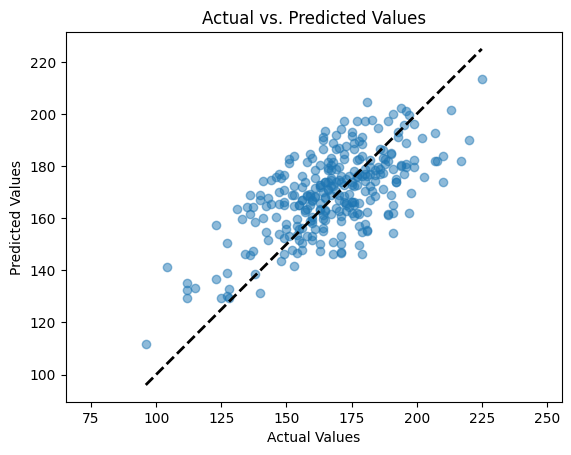

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.title('Actual vs. Predicted Values')
plt.show()


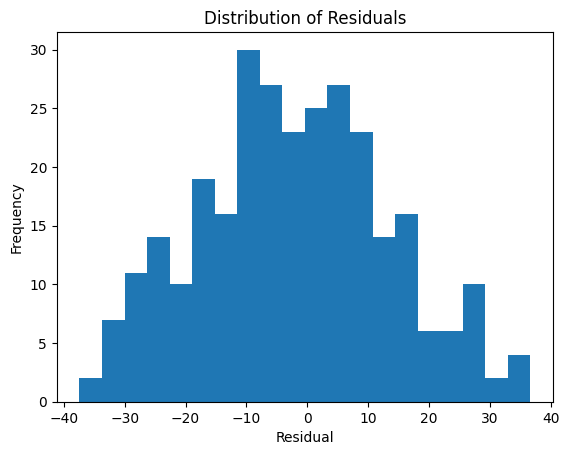

In [ ]:
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


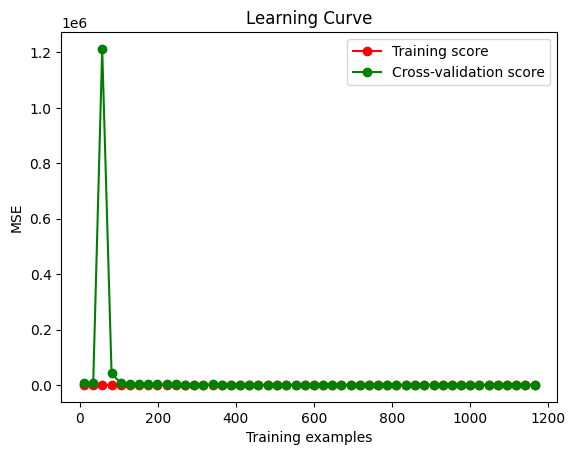

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()


In [ ]:
# Assuming y_pred are the predictions and X_test.index are the corresponding dates
predicted_df = pd.DataFrame({
    'Date': X_test.index,
    'Predicted Count': y_pred
})

# Resetting index to make 'Date' a column for display purposes
predicted_df.reset_index(drop=True, inplace=True)

# Optionally, you can round the predictions if they are not integers
predicted_df['Predicted Count'] = predicted_df['Predicted Count'].round()

# Print a sample of the predicted values
print(predicted_df.head())  # Adjust the number inside head() to print more or less values


        Date  Predicted Count
0 2021-05-16            190.0
1 2023-06-20            197.0
2 2021-02-19            184.0
3 2022-11-17            166.0
4 2022-11-04            173.0


#LSTM


In [ ]:
aggregated_data = aggregate(arrivals_data, weather_data)
aggregated_data

,Count,T,F,FG,R,TGN,V,SND,ATT_N,ATT_E,Holiday,Event,Date_x,Date_y,Weekday_x,Weekday_y
Date,,,,,,,,,,,,,,,,
2020-01-01,212,2.072093,6.339826,12.197384,0.184932,0.4,14.5000,0.0,-0.777122,-0.446831,1,0,0.999853,0.017166,-0.222521,0.974928
2020-01-02,182,-2.726744,6.088081,11.617442,0.115068,-3.6,13.8750,2.0,0.112093,-0.529767,0,0,0.999411,0.034328,-0.900969,0.433884
2020-01-03,174,-6.341570,5.386047,10.100581,0.089041,-5.1,27.2625,10.0,0.380698,-0.193721,0,0,0.998674,0.051479,-0.900969,-0.433884
2020-01-04,138,0.877616,9.528488,16.912791,0.793151,-16.6,21.3875,6.0,-0.412558,0.552558,0,0,0.997643,0.068615,-0.222521,-0.974928
2020-01-05,164,2.738953,6.646802,12.798256,0.154795,0.1,20.3750,0.0,-0.692238,0.035436,0,0,0.996318,0.085731,0.623490,-0.781831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,185,-2.881250,0.493750,1.884375,0.152000,-3.8,53.1250,23.0,-0.048437,0.155313,0,0,0.996318,-0.085731,-0.222521,0.974928
2023-12-28,166,-2.225000,1.590625,4.271875,0.030769,-9.6,24.2875,22.0,0.247812,0.601562,0,0,0.997643,-0.068615,-0.900969,0.433884
2023-12-29,183,-4.343750,0.618750,1.815625,0.112000,-5.7,24.3125,25.0,-0.311563,0.348438,0,0,0.998674,-0.051479,-0.900969,-0.433884


In [ ]:
print(aggregated_data.columns)

Index(['Count', 'T', 'F', 'FG', 'R', 'TGN', 'V', 'SND', 'ATT_N', 'ATT_E',
       'Holiday', 'Event', 'Date_x', 'Date_y', 'Weekday_x', 'Weekday_y'],
      dtype='object')


In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

feature_columns_to_keep = ['T', 'F', 'R', 'TGN', 'FG', 'V', 'SND', 'ATT_N', 'ATT_E', 'Holiday', 'Date_x', 'Date_y', 'Weekday_x', 'Weekday_y']

features = aggregated_data[feature_columns_to_keep]


scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, index=aggregated_data.index, columns=feature_columns_to_keep)

count_original = aggregated_data['Count'].values

window_size = 20

def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i:(i + window_size)])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(features_scaled_df.values, count_original, window_size)

#Skipta 70/15/15
X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#LTSM nodel
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, X.shape[2])))
model.add(LSTM(40, activation='relu', return_sequences=True, dropout=0.2))
model.add(LSTM(20, activation='relu', ))
model.add(Dense(1))

model.compile(optimizer='Nadam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            13000     
                                                                 
 lstm_1 (LSTM)               (None, 20, 40)            14560     
                                                                 
 lstm_2 (LSTM)               (None, 20)                4880      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 32461 (126.80 KB)
Trainable params: 32461 (126.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=120, validation_data=(X_test, y_test2))

predictions = model.predict(X_test)

Epoch 1/120
36/36 [==============================] - 11s 100ms/step - loss: 13049.4619 - val_loss: 1135.0146
Epoch 2/120
36/36 [==============================] - 2s 57ms/step - loss: 908.2491 - val_loss: 492.6748
Epoch 3/120
36/36 [==============================] - 2s 58ms/step - loss: 626.7108 - val_loss: 440.1681
Epoch 4/120
36/36 [==============================] - 2s 58ms/step - loss: 535.2446 - val_loss: 440.5333
Epoch 5/120
36/36 [==============================] - 2s 57ms/step - loss: 520.2867 - val_loss: 437.0742
Epoch 6/120
36/36 [==============================] - 3s 78ms/step - loss: 519.1694 - val_loss: 434.1013
Epoch 7/120
36/36 [==============================] - 3s 77ms/step - loss: 496.1410 - val_loss: 418.0998
Epoch 8/120
36/36 [==============================] - 2s 55ms/step - loss: 472.7292 - val_loss: 477.2337
Epoch 9/120
36/36 [==============================] - 2s 55ms/step - loss: 449.3335 - val_loss: 497.0822
Epoch 10/120
36/36 [==============================] - 2s 56

In [ ]:
predictions

array([[177.61934 ],
       [158.9367  ],
       [163.72215 ],
       [ 88.28888 ],
       [181.18484 ],
       [176.83246 ],
       [156.93234 ],
       [181.49553 ],
       [181.86813 ],
       [141.25934 ],
       [175.99452 ],
       [159.19402 ],
       [164.65808 ],
       [179.84645 ],
       [150.77995 ],
       [158.34529 ],
       [171.30022 ],
       [192.94081 ],
       [139.19276 ],
       [161.4353  ],
       [186.22523 ],
       [168.4733  ],
       [169.59215 ],
       [177.47728 ],
       [183.9055  ],
       [169.2275  ],
       [182.79312 ],
       [169.09828 ],
       [106.213974],
       [133.67754 ],
       [180.26118 ],
       [170.96532 ],
       [164.32132 ],
       [194.99266 ],
       [182.23363 ],
       [179.63487 ],
       [112.73821 ],
       [121.18593 ],
       [180.5646  ],
       [188.4062  ],
       [119.969284],
       [154.30017 ],
       [160.59853 ],
       [127.044235],
       [162.98885 ],
       [186.95245 ],
       [ 73.77404 ],
       [147.9

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'y_test' is the true 'Count' values for the test set and has been inverse transformed to the original scale
# And 'predictions_original_scale' is your predicted 'Count' values, also in the original scale

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test2, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test2, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 14.243486952204194
Mean Squared Error: 304.78568417653435
Root Mean Squared Error: 17.458112274141623


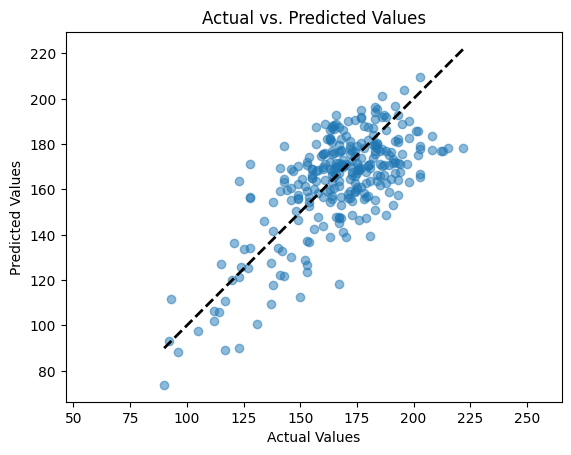

In [ ]:
plt.scatter(y_test2, predictions,alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.title('Actual vs. Predicted Values')
plt.show()

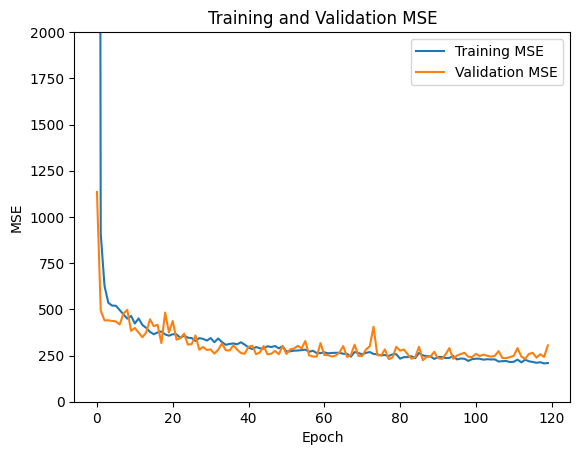

In [ ]:
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.ylim(0, 2000)
plt.show()

#Einföld gisk

In [ ]:
average_Y = sum(y_train) / len(y_train)
ER = np.abs(y_test2-average_Y)
MER = sum(ER) / len(ER)
print(MER)

16.64006632064591


In [ ]:
n = 12
moving_averages = np.convolve(y_test2, np.ones(n)/n, mode='valid')
moving_averages = np.pad(moving_averages, (n-1, 0), mode='constant', constant_values=average_Y)
shifted_moving_av = moving_averages[:-1]
loka_moving_av = np.insert(shifted_moving_av, 0, average_Y)

ER_movingav = np.abs(y_test2-loka_moving_av)
MER_movingav = sum(ER_movingav) / len(ER_movingav)
print(MER_movingav)

17.95083621683968


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('LTSMmodel')

In [ ]:
predictions = model.predict(X_test)


10/10 [==============================] - 1s 14ms/step


In [ ]:
threshold = 40

#Average
print("Average:")
over_threshold_av = [num for num in ER if num > threshold]
count_over_threshold_av = len(over_threshold_av)
if count_over_threshold_av != 0:
  av_over_threshold_av = sum(over_threshold_av)/count_over_threshold_av
print("Fjöldi giska sem eru með hærri villu en",threshold,"eru:", count_over_threshold_av)
if count_over_threshold_av != 0:
  print("Meðalt tal þeirra giska:",av_over_threshold_av)
print("\n")

#Moving average
print("Moving Average:")
over_threshold_mav = [num for num in ER_movingav if num > threshold]
count_over_threshold_mav = len(over_threshold_mav)
if count_over_threshold_mav != 0:
  av_over_threshold_mav = sum(over_threshold_mav)/count_over_threshold_mav
print("Fjöldi giska sem eru með hærri villu en",threshold,"eru:", count_over_threshold_mav)
if count_over_threshold_mav != 0:
  print("Meðalt tal þeirra giska:",av_over_threshold_mav)
print("\n")

#Samanburðarlíkan
print("Regression:")
ER_reg = np.abs(y_test-y_pred)
over_threshold_reg = [num for num in ER_reg if num > threshold]
count_over_threshold_reg = len(over_threshold_reg)
if count_over_threshold_reg != 0:
  av_over_threshold_reg = sum(over_threshold_reg)/count_over_threshold_reg
print("Fjöldi giska sem eru með hærri villu en",threshold,"eru:", count_over_threshold_reg)
if count_over_threshold_reg != 0:
  print("Meðalt tal þeirra giska:",av_over_threshold_reg)
print("\n")


#LSTM
print("LSTM:")
predictionsFL = predictions.flatten()
ER_LSTM = np.abs(y_test2-predictionsFL)
over_threshold_LSTM = [num for num in ER_LSTM if num > threshold]
count_over_threshold_LSTM = len(over_threshold_LSTM)
if count_over_threshold_LSTM != 0:
  av_over_threshold_LSTM = sum(over_threshold_LSTM)/count_over_threshold_LSTM
print("Fjöldi giska sem eru með hærri villu en",threshold,"eru:", count_over_threshold_LSTM)
if count_over_threshold_LSTM != 0:
  print("Meðalt tal þeirra giska:",av_over_threshold_LSTM)
print("\n")

Average:
Fjöldi giska sem eru með hærri villu en 40 eru: 27
Meðalt tal þeirra giska: 52.056841563786


Moving Average:
Fjöldi giska sem eru með hærri villu en 40 eru: 25
Meðalt tal þeirra giska: 53.37972222222223


Regression:
Fjöldi giska sem eru með hærri villu en 40 eru: 0


LSTM:
Fjöldi giska sem eru með hærri villu en 40 eru: 3
Meðalt tal þeirra giska: 43.14734903971354




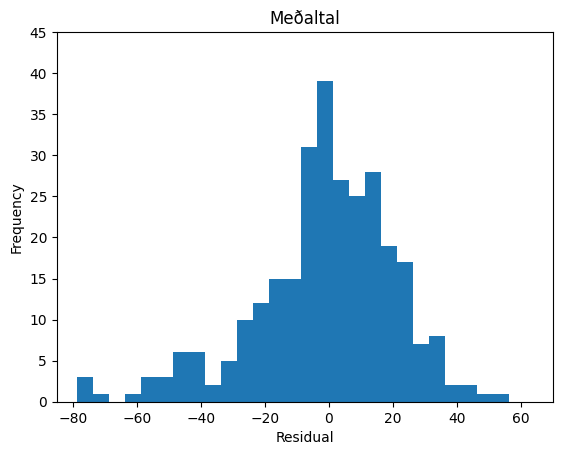

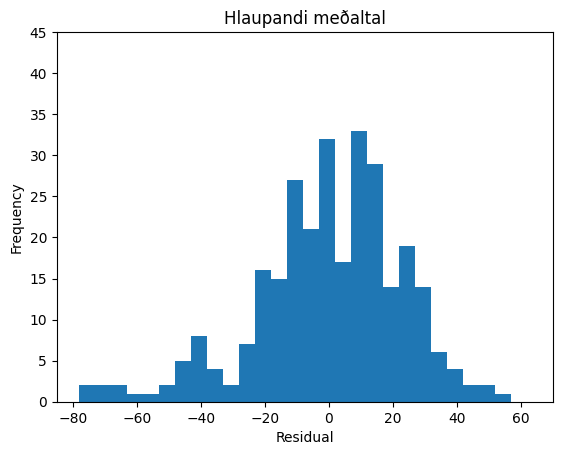

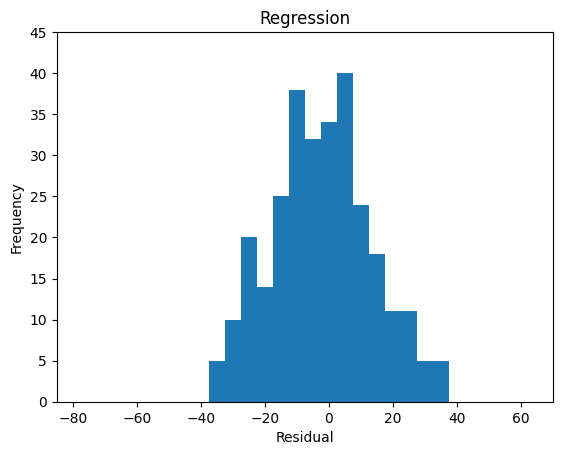

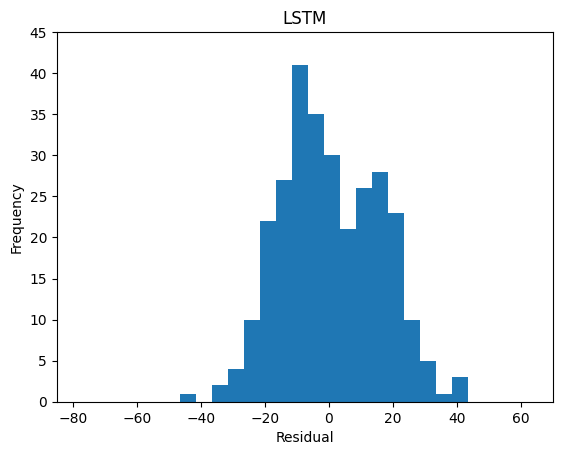

In [ ]:
bin_width = 5
height_plot = 45

#Meðaltal
residuals_av = y_test2-average_Y
plt.hist(residuals_av, bins=np.arange(min(residuals_av), max(residuals_av) + bin_width, bin_width))
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Meðaltal')
plt.xlim(-85, 70)
plt.ylim(0, height_plot)
plt.show()

#Moving average
residuals_mav = y_test2-loka_moving_av
plt.hist(residuals_mav, bins=np.arange(min(residuals_mav), max(residuals_av) + bin_width, bin_width))
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Hlaupandi meðaltal')
plt.xlim(-85, 70)
plt.ylim(0, height_plot)
plt.show()

#Samanburðarlíkan
residuals_reg = y_test-y_pred
plt.hist(residuals_reg, bins=np.arange(min(residuals_reg), max(residuals_av) + bin_width, bin_width))
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Regression')
plt.xlim(-85, 70)
plt.ylim(0, height_plot)
plt.show()

#LSTM
residuals_LSTM = y_test2-predictionsFL
plt.hist(residuals_LSTM, bins=np.arange(min(residuals_LSTM), max(residuals_av) + bin_width, bin_width))
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('LSTM')
plt.xlim(-85, 70)
plt.ylim(0, height_plot)
plt.show()

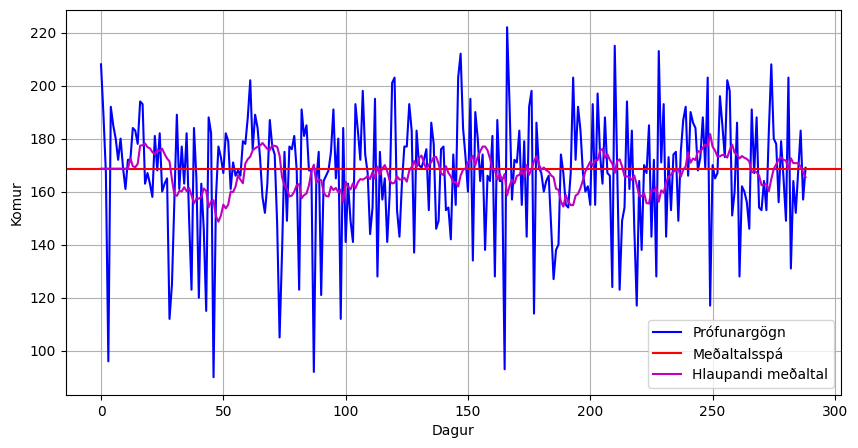

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
plt.plot(y_test2, marker='', linestyle='-', color='b', label='Prófunargögn')  # 'o' is a circle marker
plt.axhline(y=average_Y, color='r', linestyle='-', label='Meðaltalsspá')
plt.plot(loka_moving_av, marker='', linestyle='-', color='m', label='Hlaupandi meðaltal')
plt.xlabel('Dagur')  # Label for the x-axis
plt.ylabel('Komur')  # Label for the y-axis
plt.grid(True)  # Enable grid for better readability
plt.legend()
plt.show()

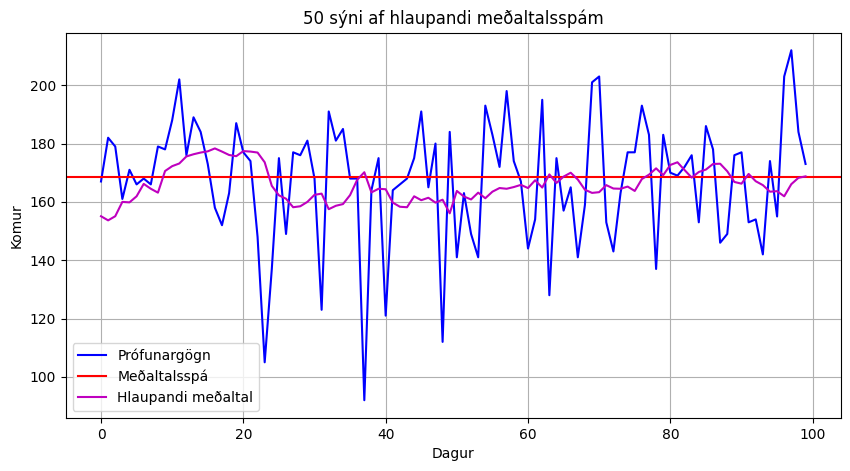

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
plt.plot(y_test2[50:150], marker='', linestyle='-', color='b', label='Prófunargögn')  # 'o' is a circle marker
plt.axhline(y=average_Y, color='r', linestyle='-', label='Meðaltalsspá')
plt.plot(loka_moving_av[50:150], marker='', linestyle='-', color='m', label='Hlaupandi meðaltal')
plt.xlabel('Dagur')  # Label for the x-axis
plt.ylabel('Komur')  # Label for the y-axis
plt.title('50 sýni af hlaupandi meðaltalsspám')
plt.grid(True)  # Enable grid for better readability
plt.legend()
plt.show()

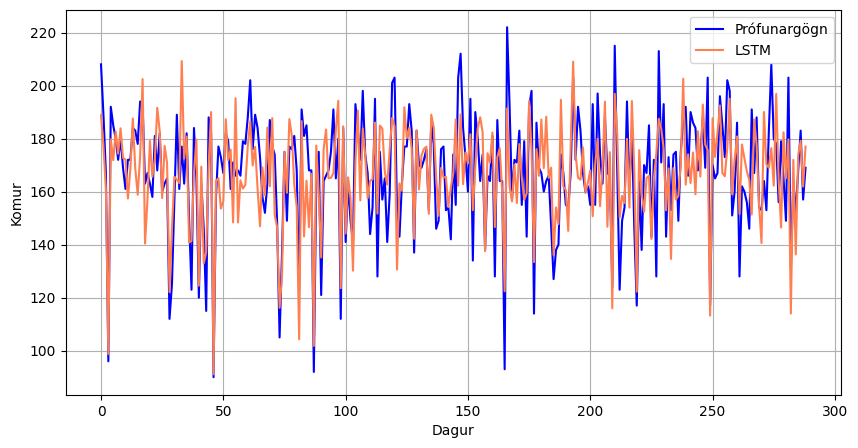

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
plt.plot(y_test2, marker='', linestyle='-', color='b', label='Prófunargögn')  # 'o' is a circle marker
plt.plot(predictionsFL, marker='', linestyle='-', color='coral', label='LSTM')
plt.xlabel('Dagur')  # Label for the x-axis
plt.ylabel('Komur')  # Label for the y-axis
plt.grid(True)  # Enable grid for better readability
plt.legend()
plt.show()

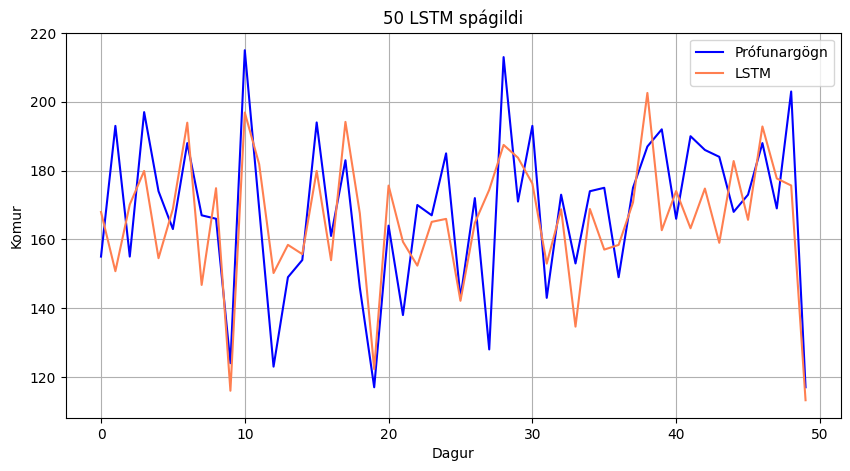

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test2[200:250], marker='', linestyle='-', color='b', label='Prófunargögn')
plt.plot(predictionsFL[200:250], marker='', linestyle='-', color='coral', label='LSTM')
plt.xlabel('Dagur')
plt.ylabel('Komur')
plt.title('50 LSTM spágildi')
plt.grid(True)
plt.legend()
plt.show()

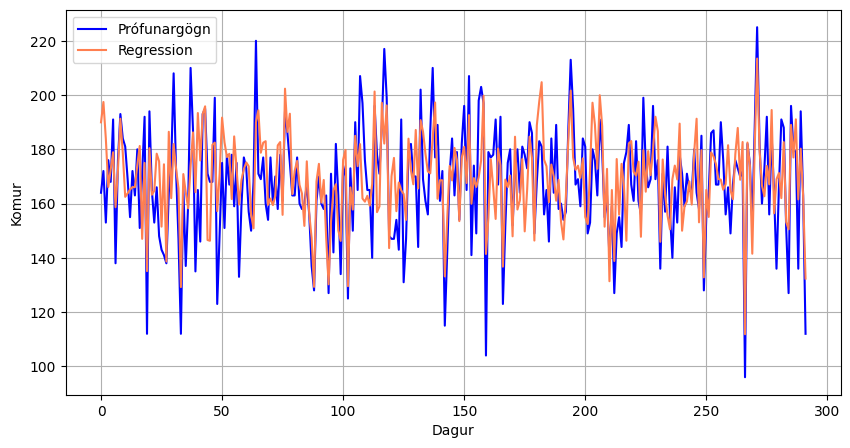

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
plt.plot(y_test.reset_index()['Count'], marker='', linestyle='-', color='b', label='Prófunargögn')
plt.plot(y_pred, marker='', linestyle='-', color='coral', label='Regression')
plt.xlabel('Dagur')  # Label for the x-axis
plt.ylabel('Komur')  # Label for the y-axis
plt.grid(True)  # Enable grid for better readability
plt.legend()
plt.show()

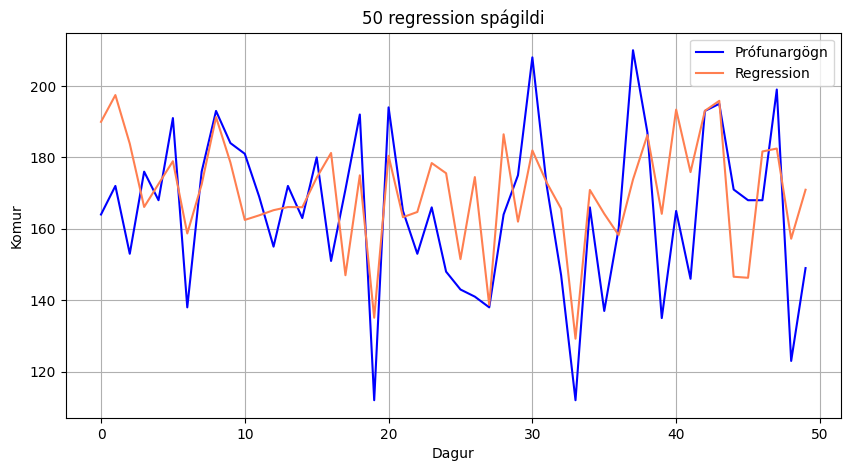

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index()['Count'][:50], marker='', linestyle='-', color='b', label='Prófunargögn')
plt.plot(y_pred[:50], marker='', linestyle='-', color='coral', label='Regression')
plt.xlabel('Dagur')
plt.ylabel('Komur')
plt.title('50 regression spágildi')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print('Meðaltal')
print('MAE:', mean_absolute_error(y_test2, [average_Y] * len(y_test2)))
print('MSE:', mean_squared_error(y_test2, [average_Y] * len(y_test2)))

print()
print('Moving average')
print('MAE:', mean_absolute_error(y_test2, loka_moving_av))
print('MSE:', mean_squared_error(y_test2, loka_moving_av))

print()
print('Regression')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

print()
print('LSTM')
print('MAE:', mean_absolute_error(y_test2, predictionsFL))
print('MSE:', mean_squared_error(y_test2, predictionsFL))

Meðaltal
MAE: 16.640066320645907
MSE: 501.43787662464234

Moving average
MAE: 17.950836216839676
MSE: 543.123872629117

Regression
MAE: 12.75933675881485
MSE: 248.2420455773005

LSTM
MAE: 12.907127459568962
MSE: 242.37592484888052


In [ ]:
aggregated_data = aggregate(arrivals_data, weather_data)


In [ ]:
top10_counts = aggregated_data.sort_values(by='Count', ascending=False).head(30)

# Similarly, sort the DataFrame in ascending order to get the lowest counts
bottom10_counts = aggregated_data.sort_values(by='Count', ascending=True).head(30)

# Print out the dates with the highest and lowest counts
print("Dates with the highest counts:")
print(top10_counts.index)

print("\nDates with the lowest counts:")
print(bottom10_counts.index)

Dates with the highest counts:
DatetimeIndex(['2023-07-10', '2023-06-19', '2021-06-07', '2023-08-14',
               '2021-06-08', '2022-04-19', '2023-12-11', '2022-05-30',
               '2023-09-25', '2023-09-10', '2023-09-04', '2023-08-24',
               '2020-01-06', '2022-05-15', '2021-05-03', '2022-05-08',
               '2023-07-04', '2023-07-24', '2021-10-04', '2022-05-02',
               '2021-05-07', '2021-02-16', '2023-09-06', '2022-08-14',
               '2021-05-14', '2023-08-25', '2021-09-13', '2023-03-27',
               '2023-03-20', '2023-09-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

Dates with the lowest counts:
DatetimeIndex(['2020-03-27', '2020-04-05', '2020-03-28', '2020-03-31',
               '2020-03-24', '2020-04-01', '2020-03-29', '2020-03-26',
               '2020-04-18', '2020-03-30', '2020-04-04', '2020-10-30',
               '2020-04-09', '2020-04-03', '2020-12-24', '2020-04-06',
               '2021-12-24', '2020-03-22', '2022-01